In [1]:
import sys
import sklearn.utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from nltk.corpus import brown
import string

In [2]:
sys.path.insert(0, "..")

In [3]:
from hmm import plots, CategoricalVariationalHMM, CategoricalHMM

In [4]:
def clean(w):
    keep = [c for c in w.lower() if c in string.ascii_lowercase or c == " "]
    return "".join(keep)

def get_words(how_many):
    chars = " ".join(clean(w) for w in brown.words())
    mapping = {}
    rmapping = {}
    for i, item in enumerate(string.ascii_lowercase + " "):
        mapping[item] = i
        rmapping[i] = item
        print(i, rmapping[i])

    sequence = np.asarray([mapping[c] for c in chars[:how_many]])
    return sequence, rmapping

In [5]:
sequence, reverse_mapping = get_words(100000)
letters = list(reverse_mapping.values())

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z
26  


In [6]:
sequence2d = sequence[None, :]

In [7]:
sequence2d

array([[19,  7,  4, ..., 20, 12, 26]])

In [12]:
# Set the B_prior to one otherwise when we sample the initial distribution
# for the emissions we will end up with probabilities less than machine precision
models = {}
for i in range(2, 12):
    models[i] = CategoricalVariationalHMM.CategoricalVariationalHMM(
        n_components=i, n_iterations=600, n_inits=5, B_prior=1
    )
    models[i].fit(sequence2d)

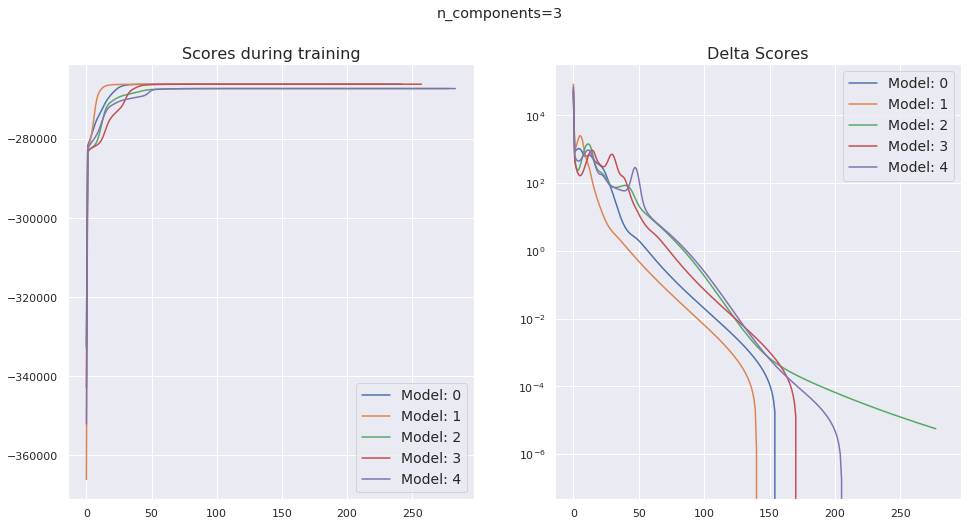

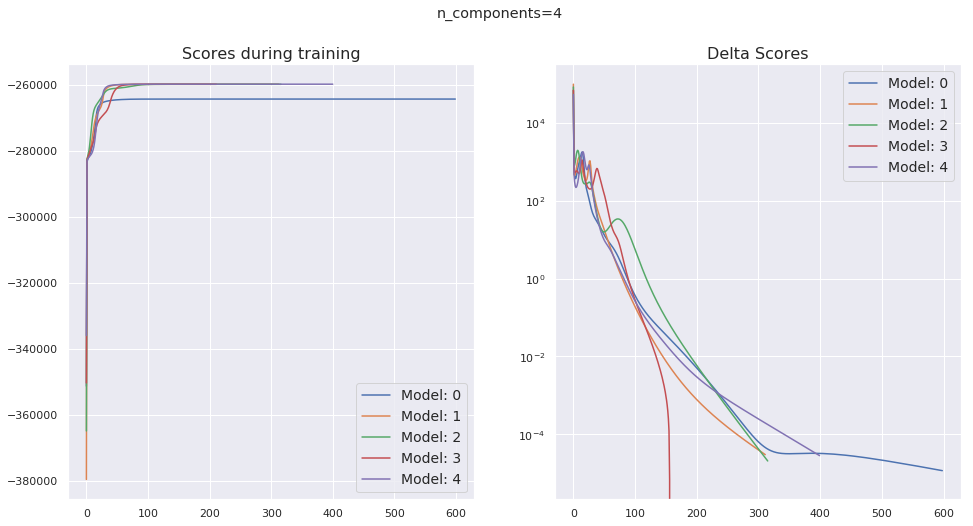

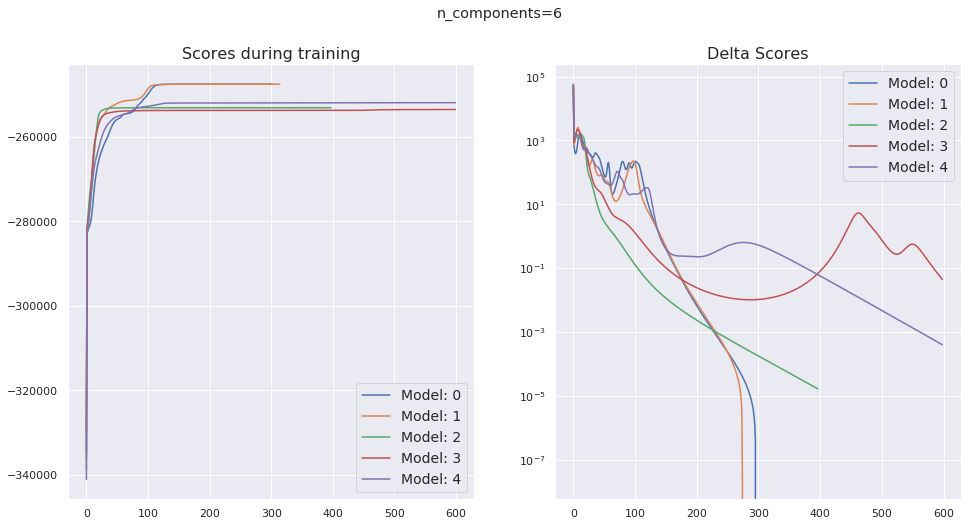

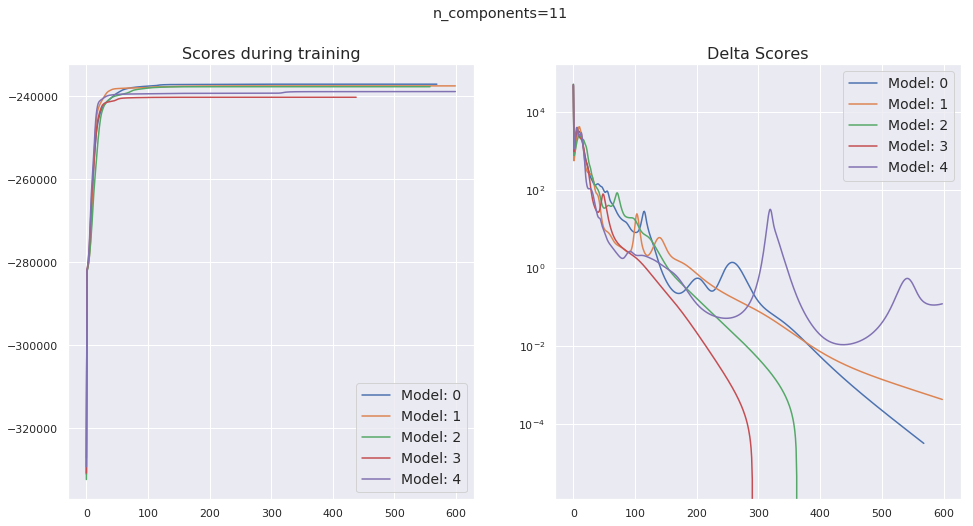

In [13]:
for i, model in models.items():
    f = plots.multiple_learning_plot(model.explored_free_energies_)
    f.suptitle("n_components={}".format(i))
    

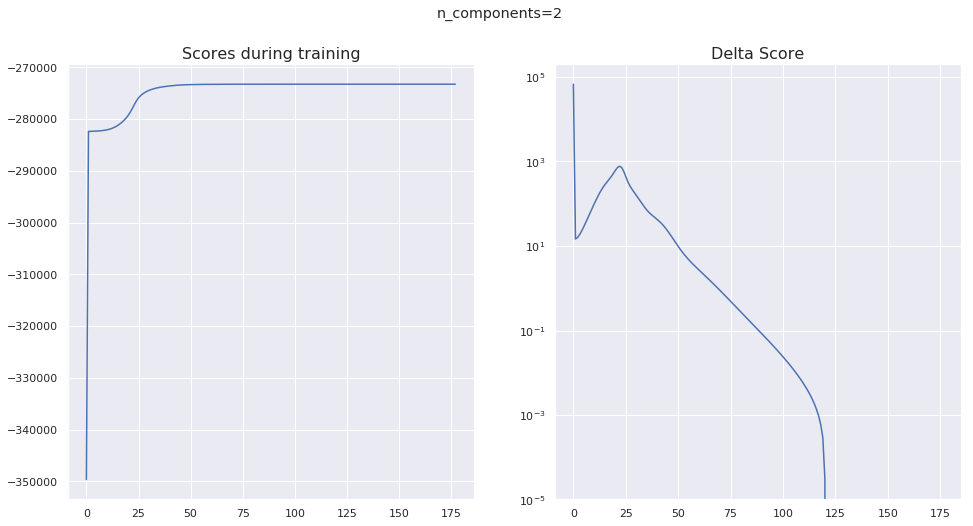

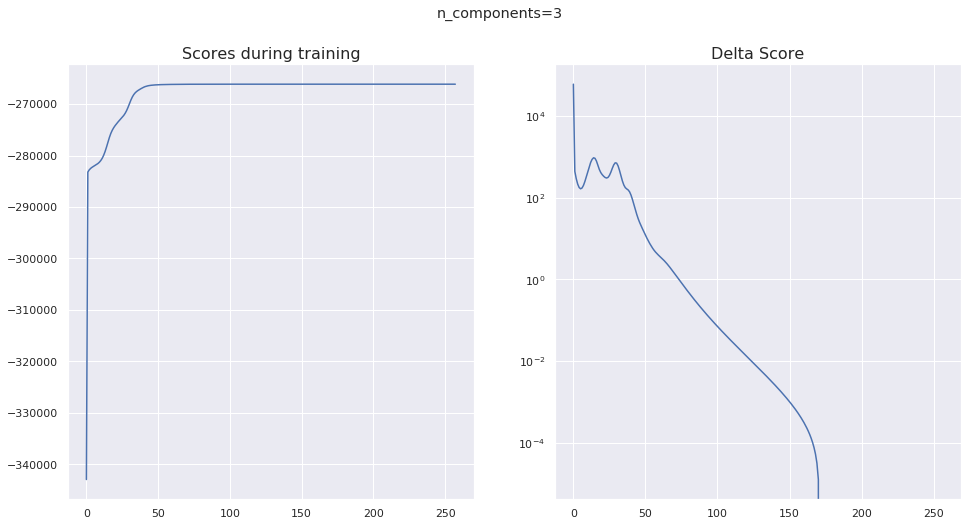

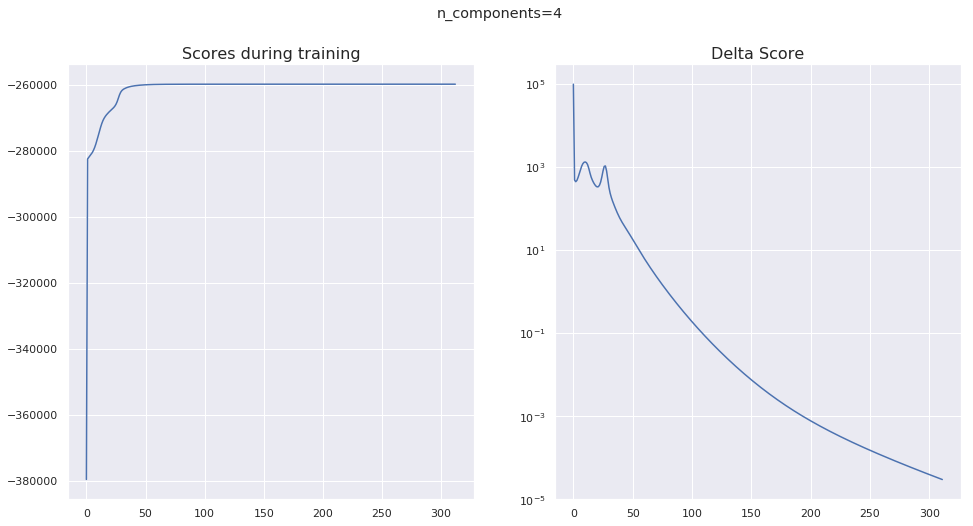

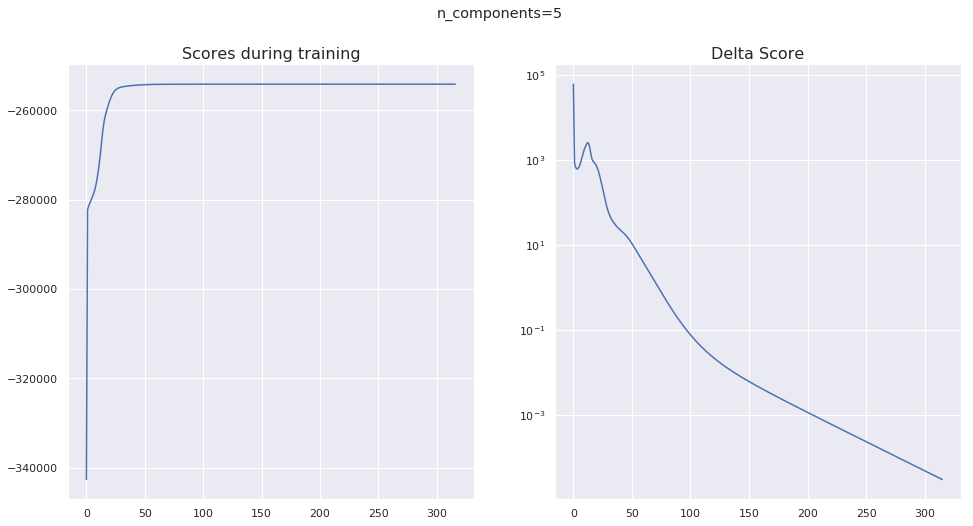

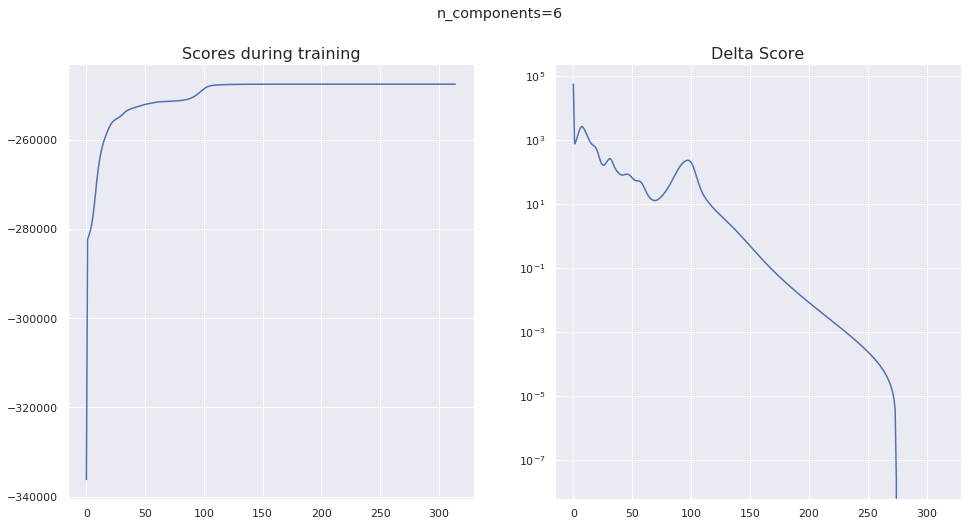

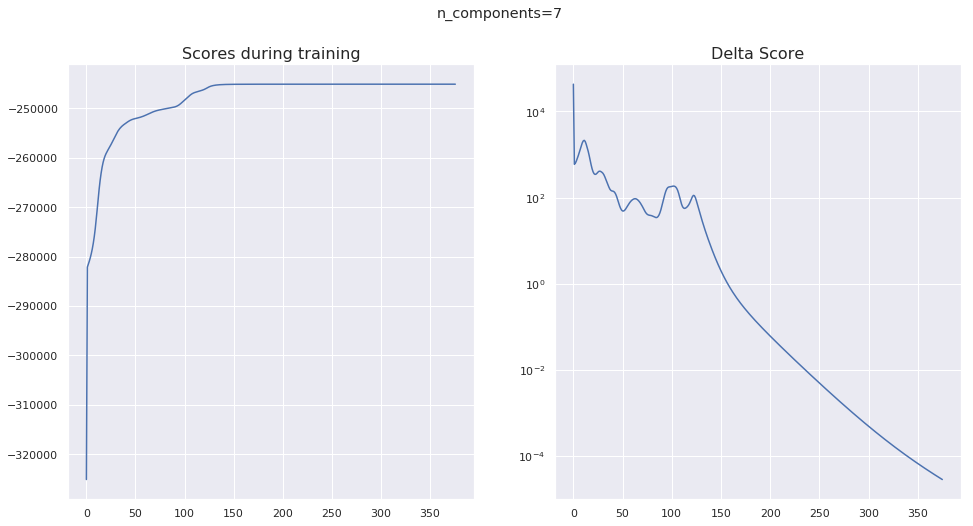

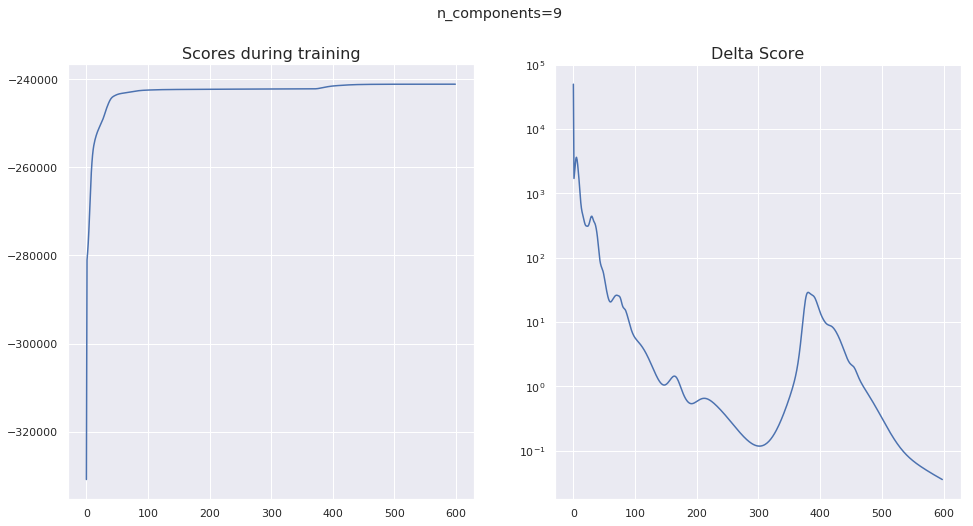

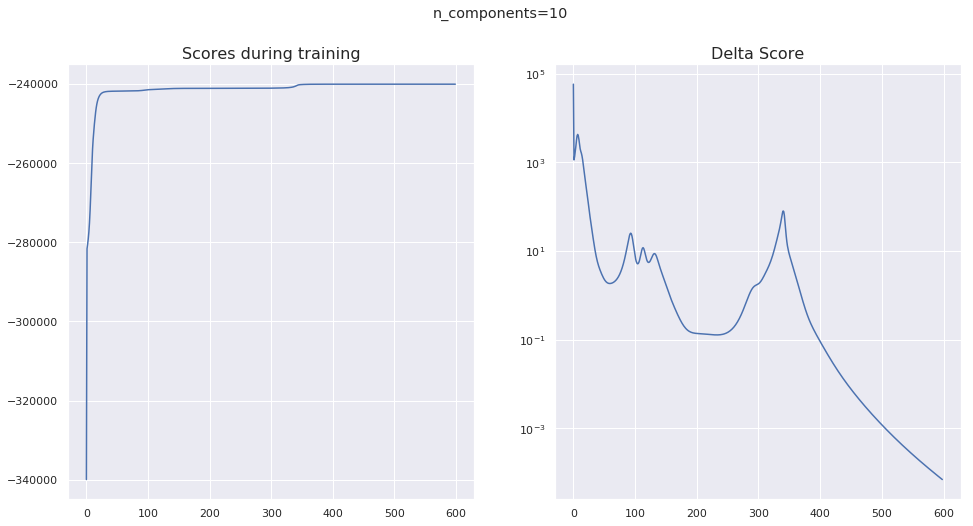

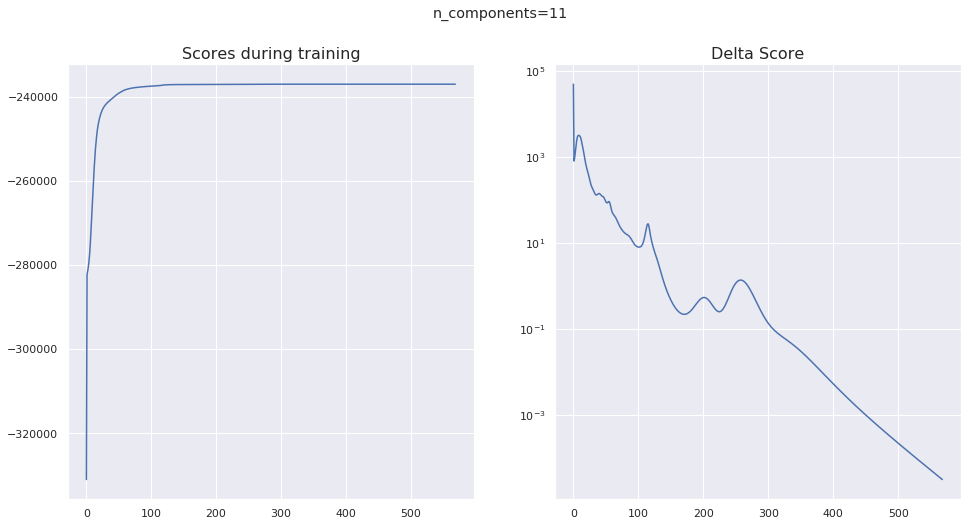

In [14]:
for i, model in models.items():
    f = plots.learning_plot(model.lower_bound_)
    f.suptitle("n_components={}".format(i))
    

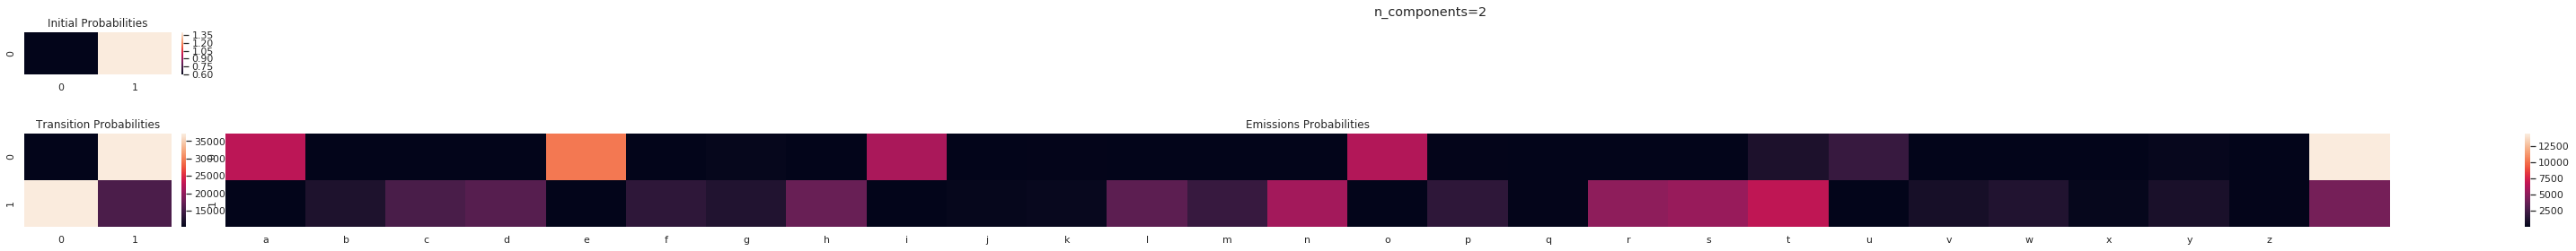

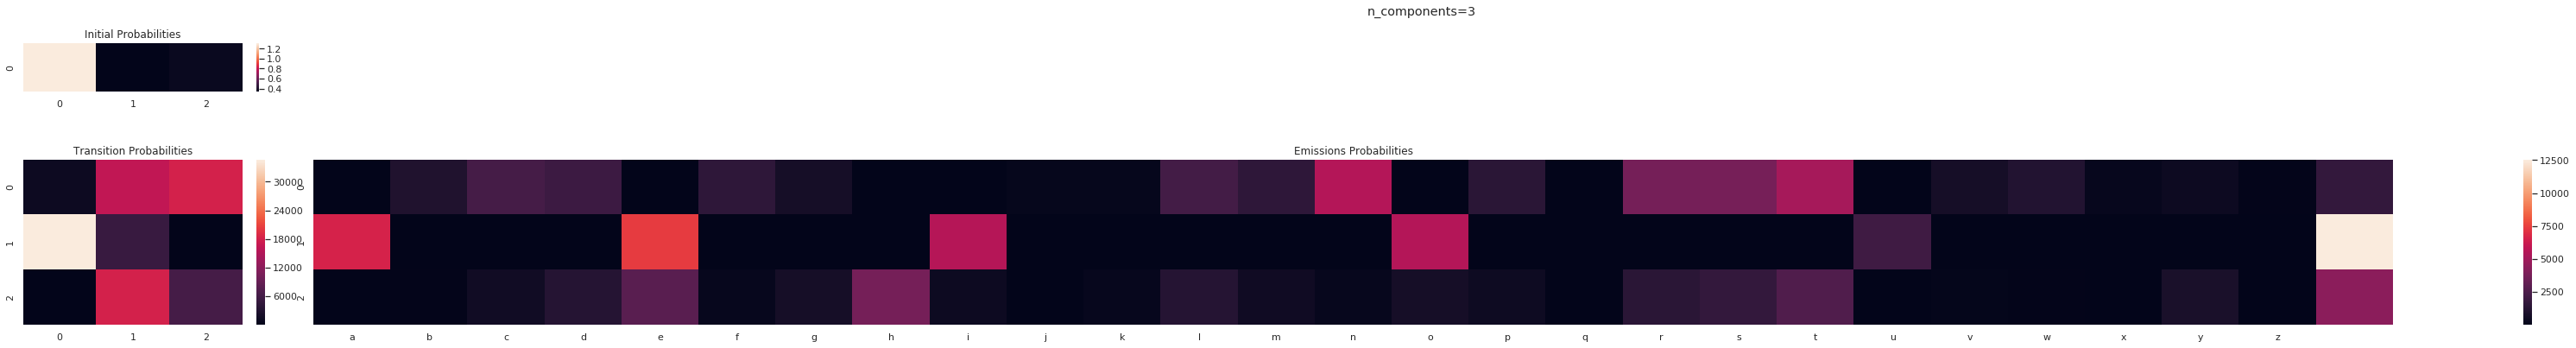

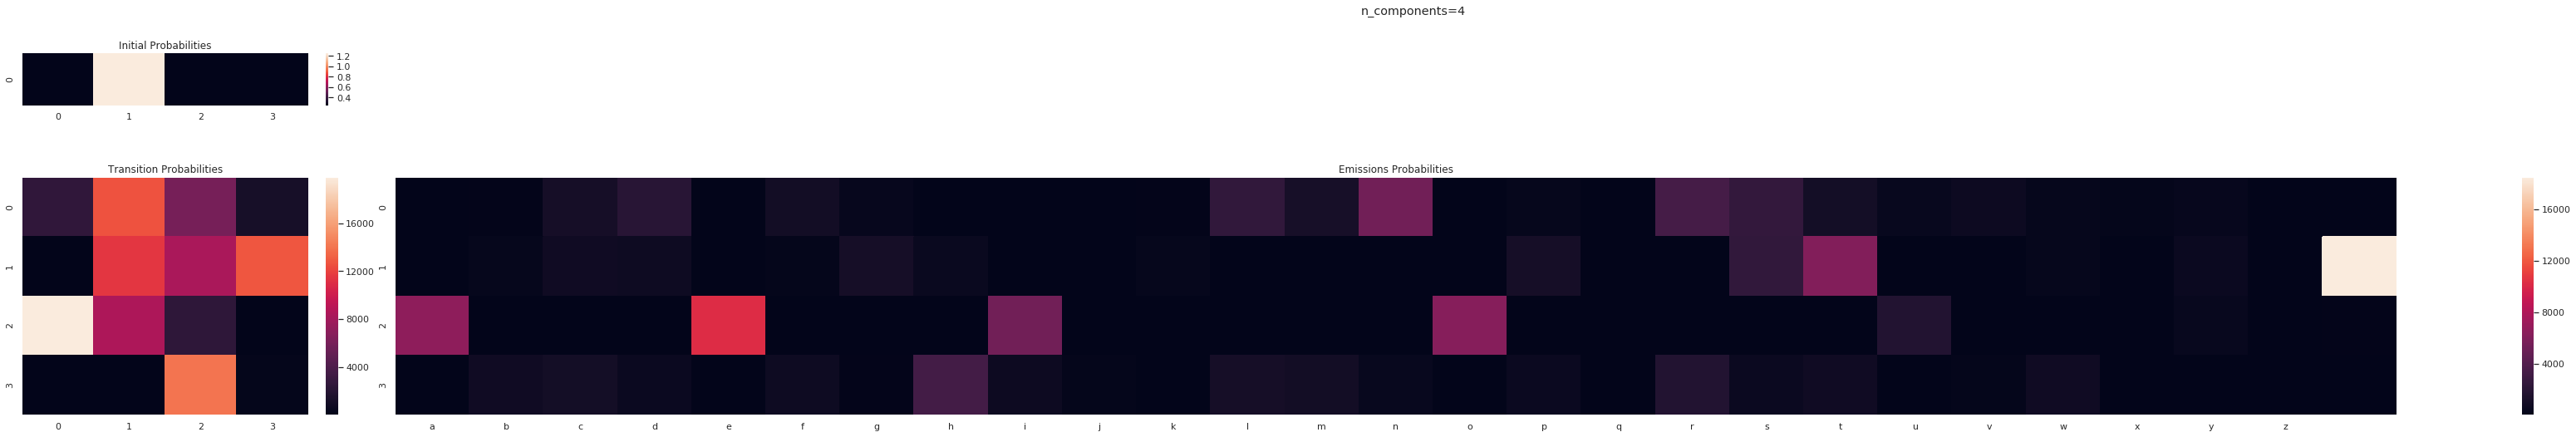

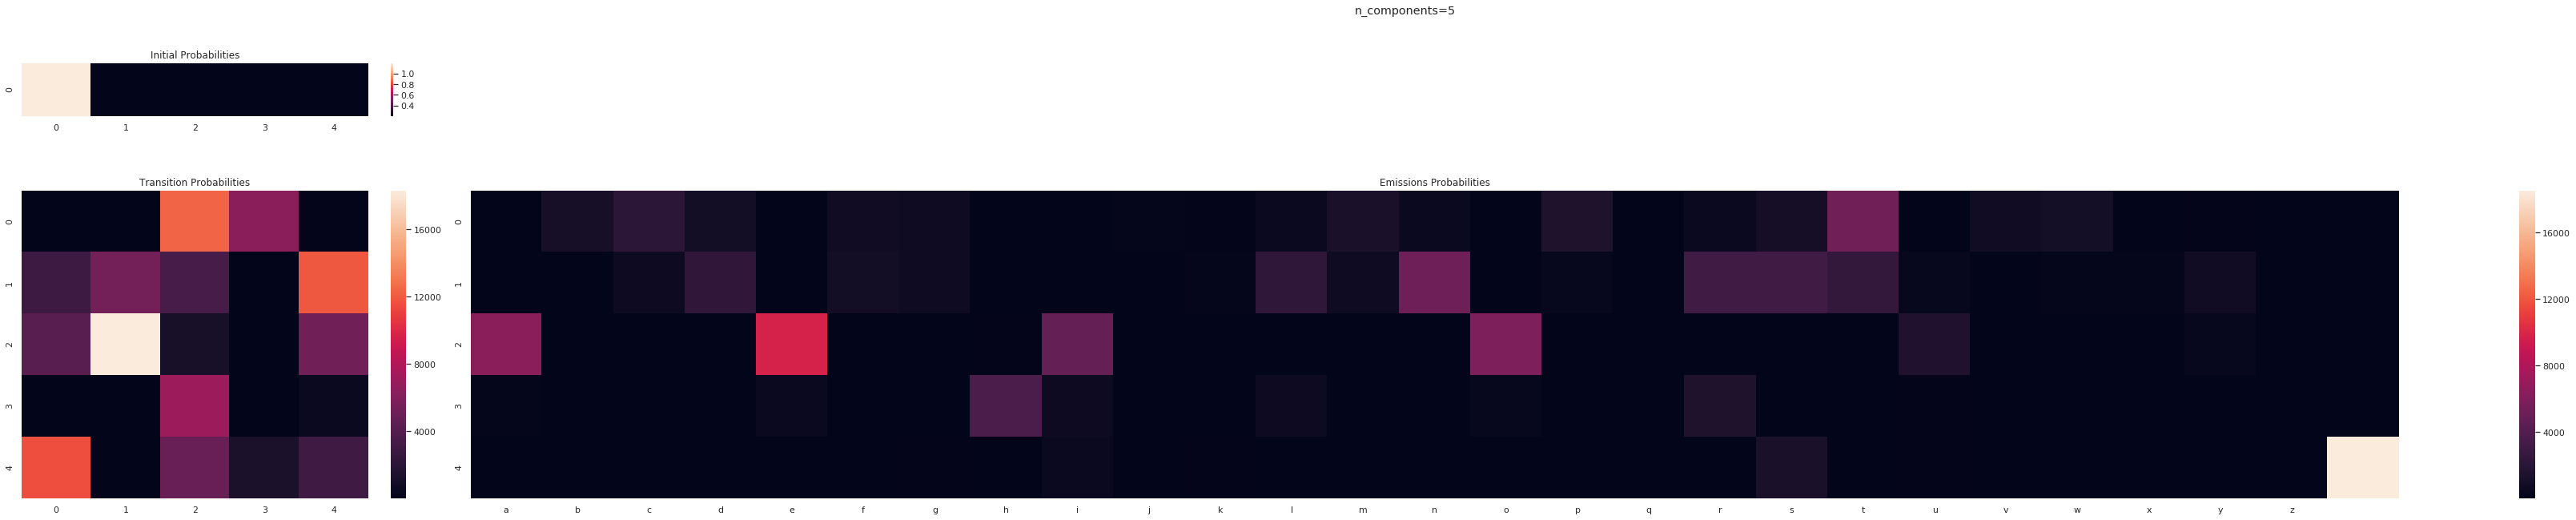

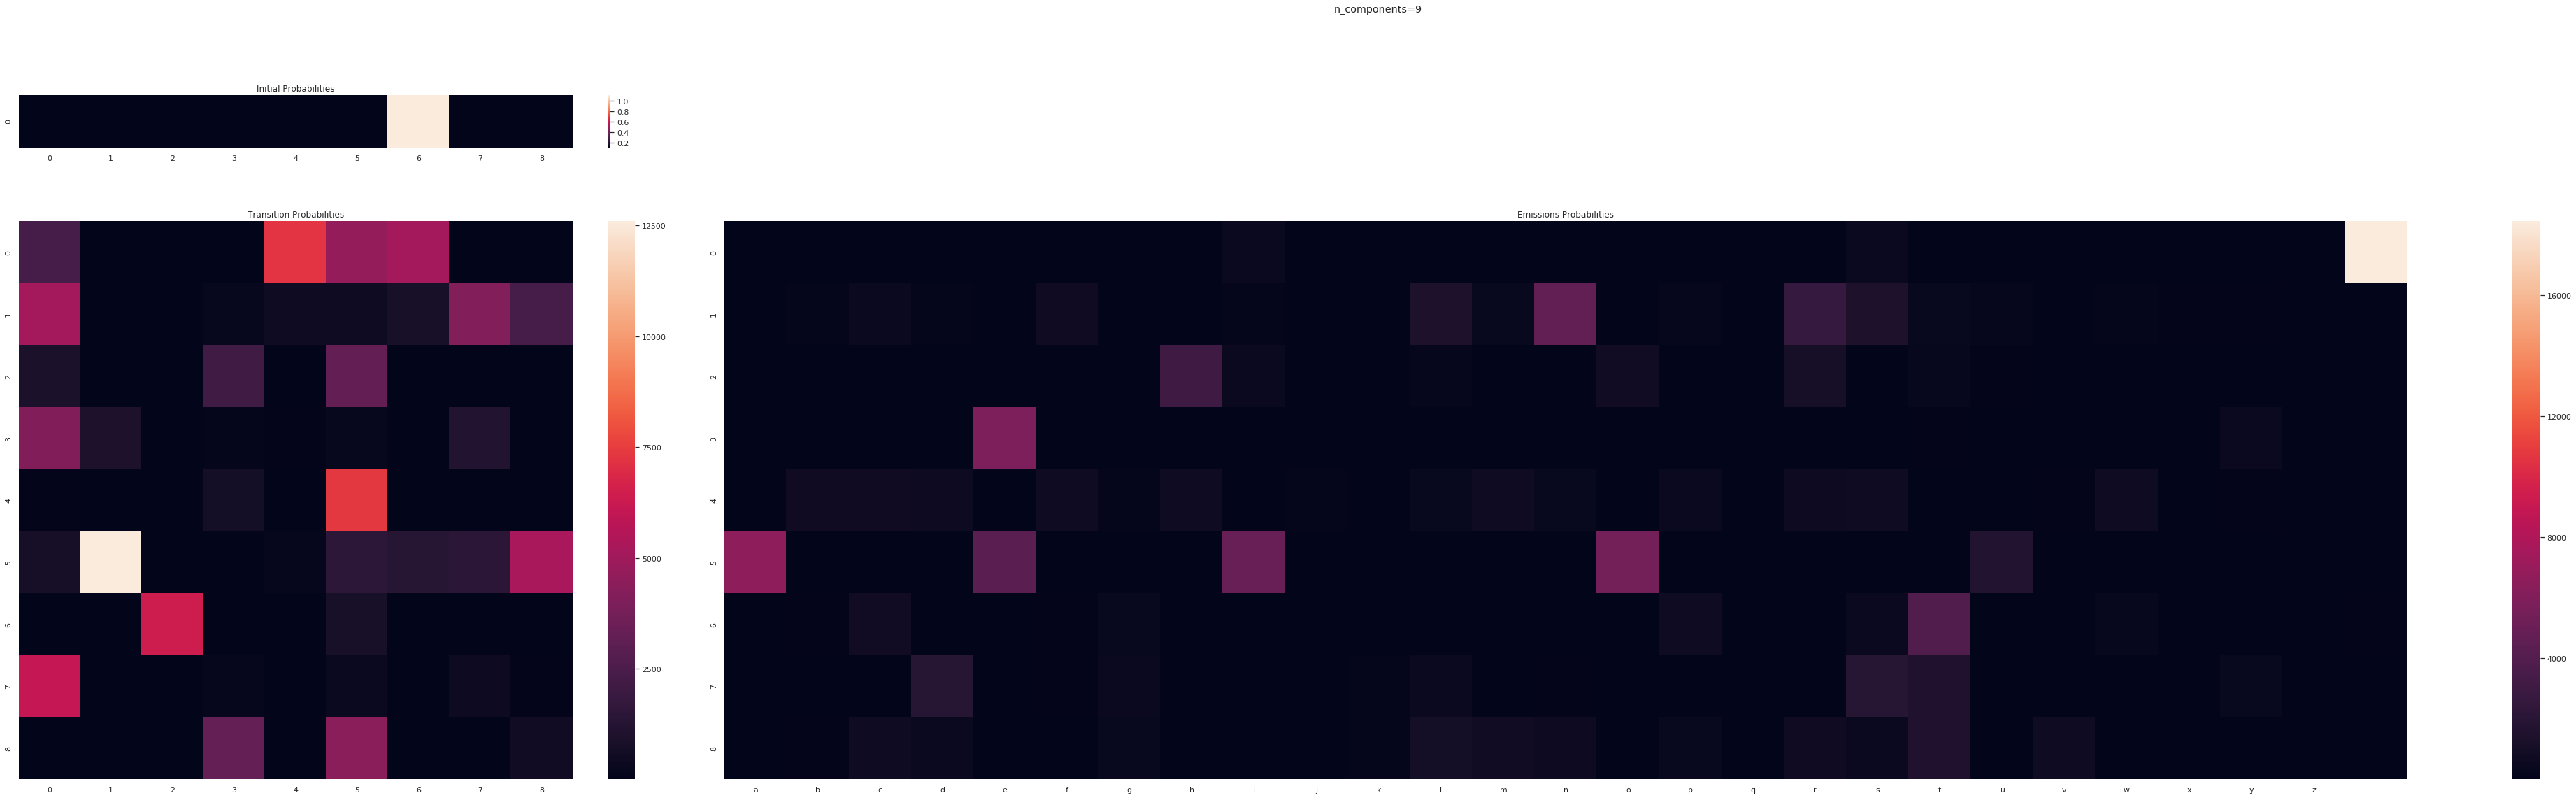

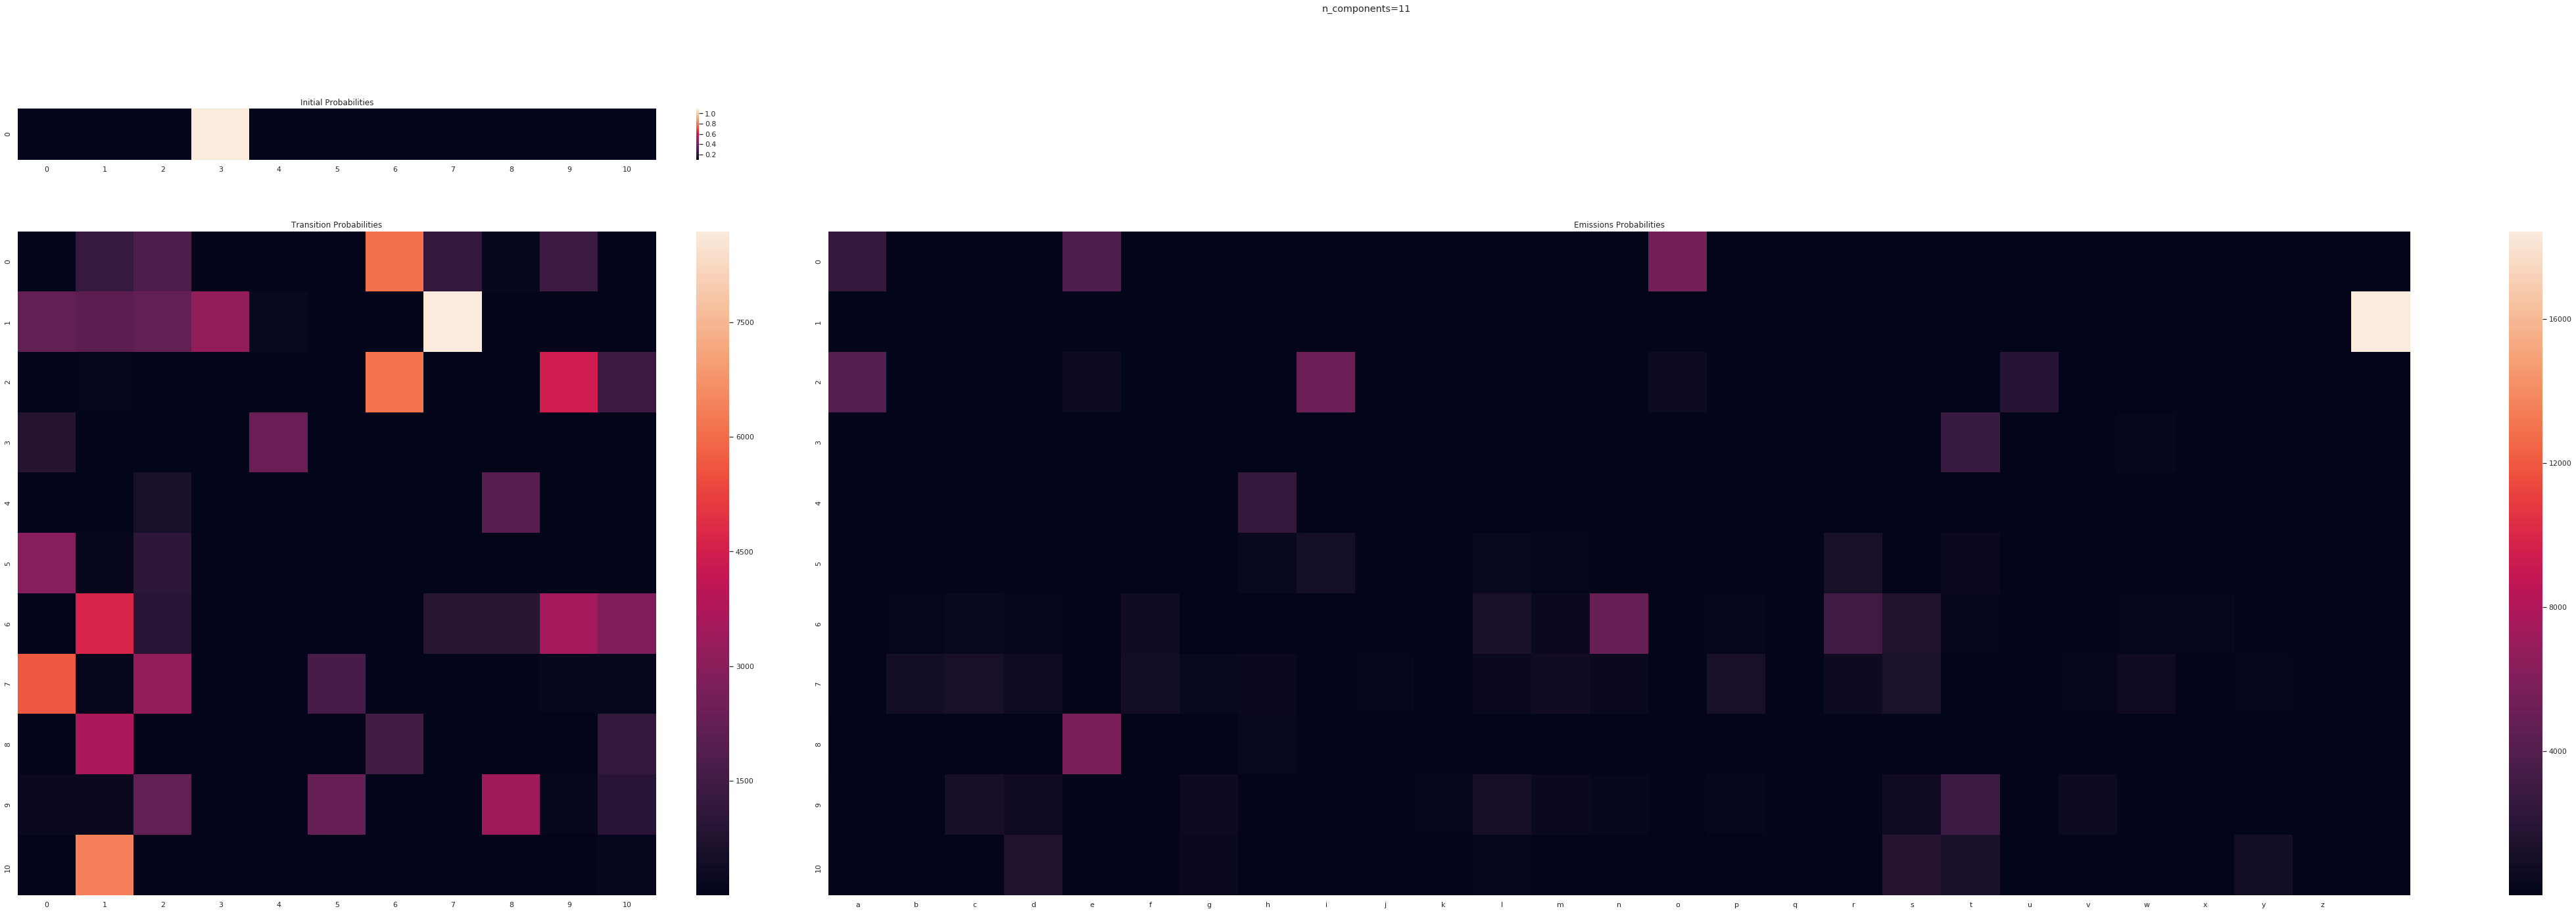

In [16]:
for i, model in models.items():
    f = plots.hinton_diagram(model.pi_counts_, model.A_counts_, model.B_counts_, b_vals=letters)
    f.suptitle("n_components={}".format(i))

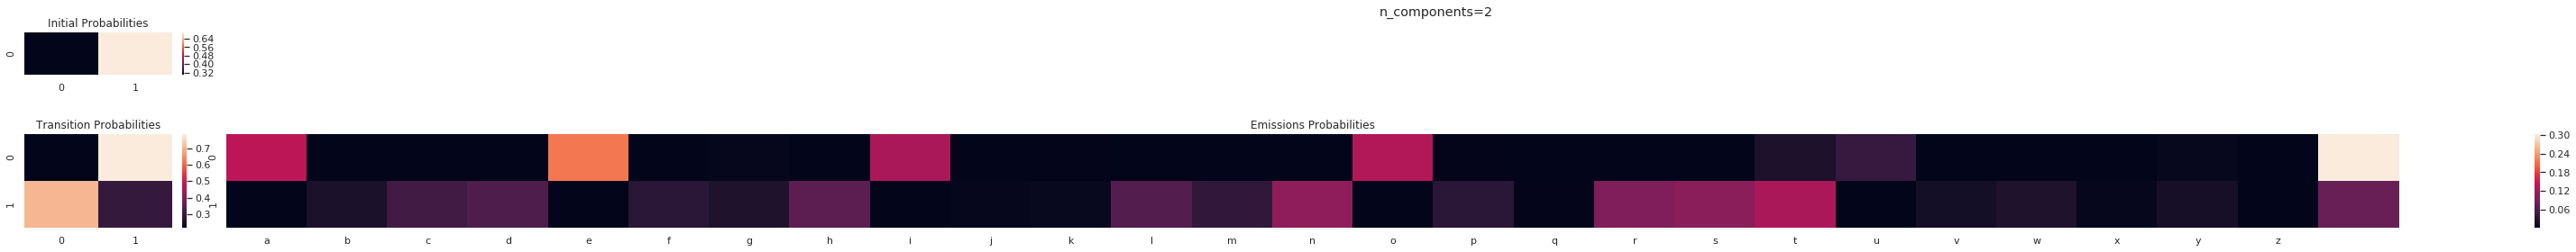

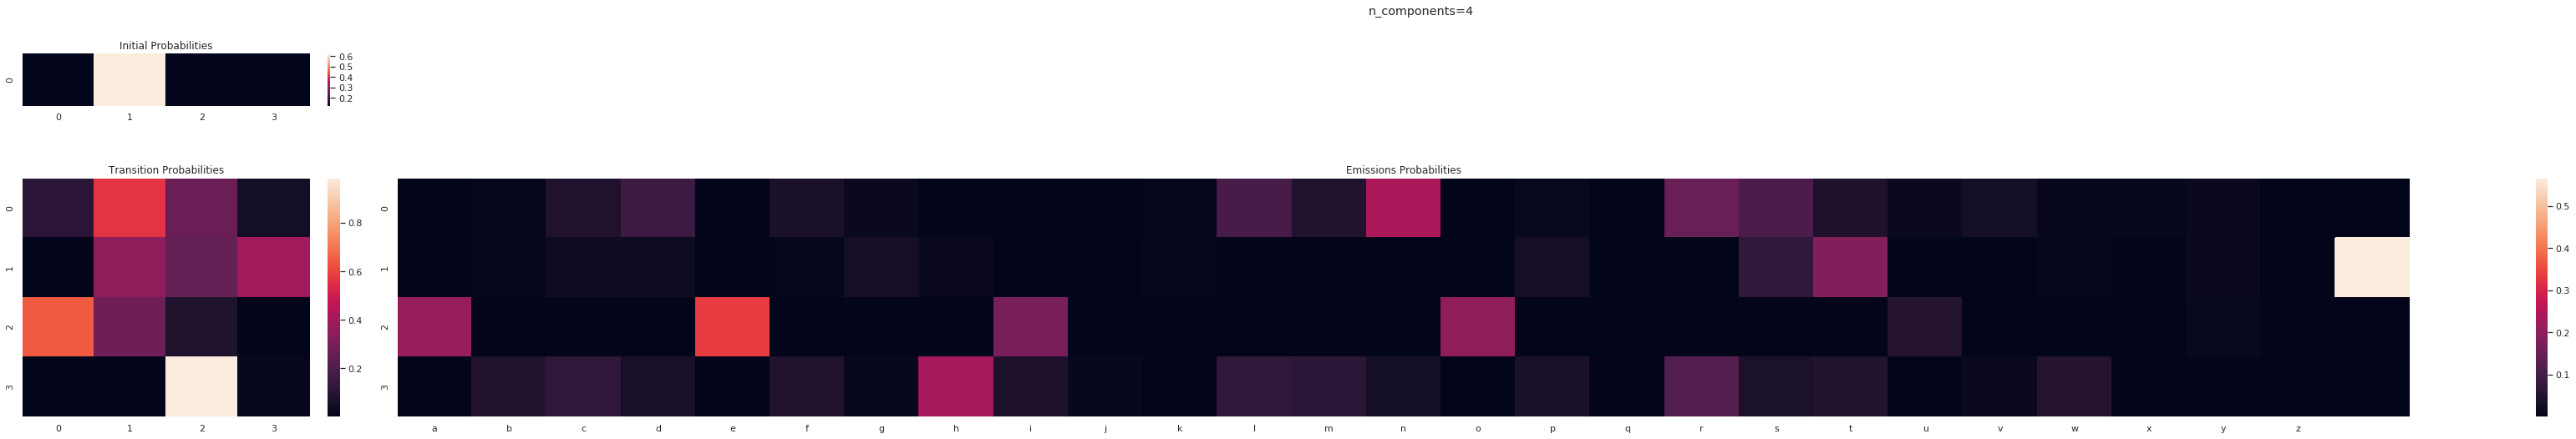

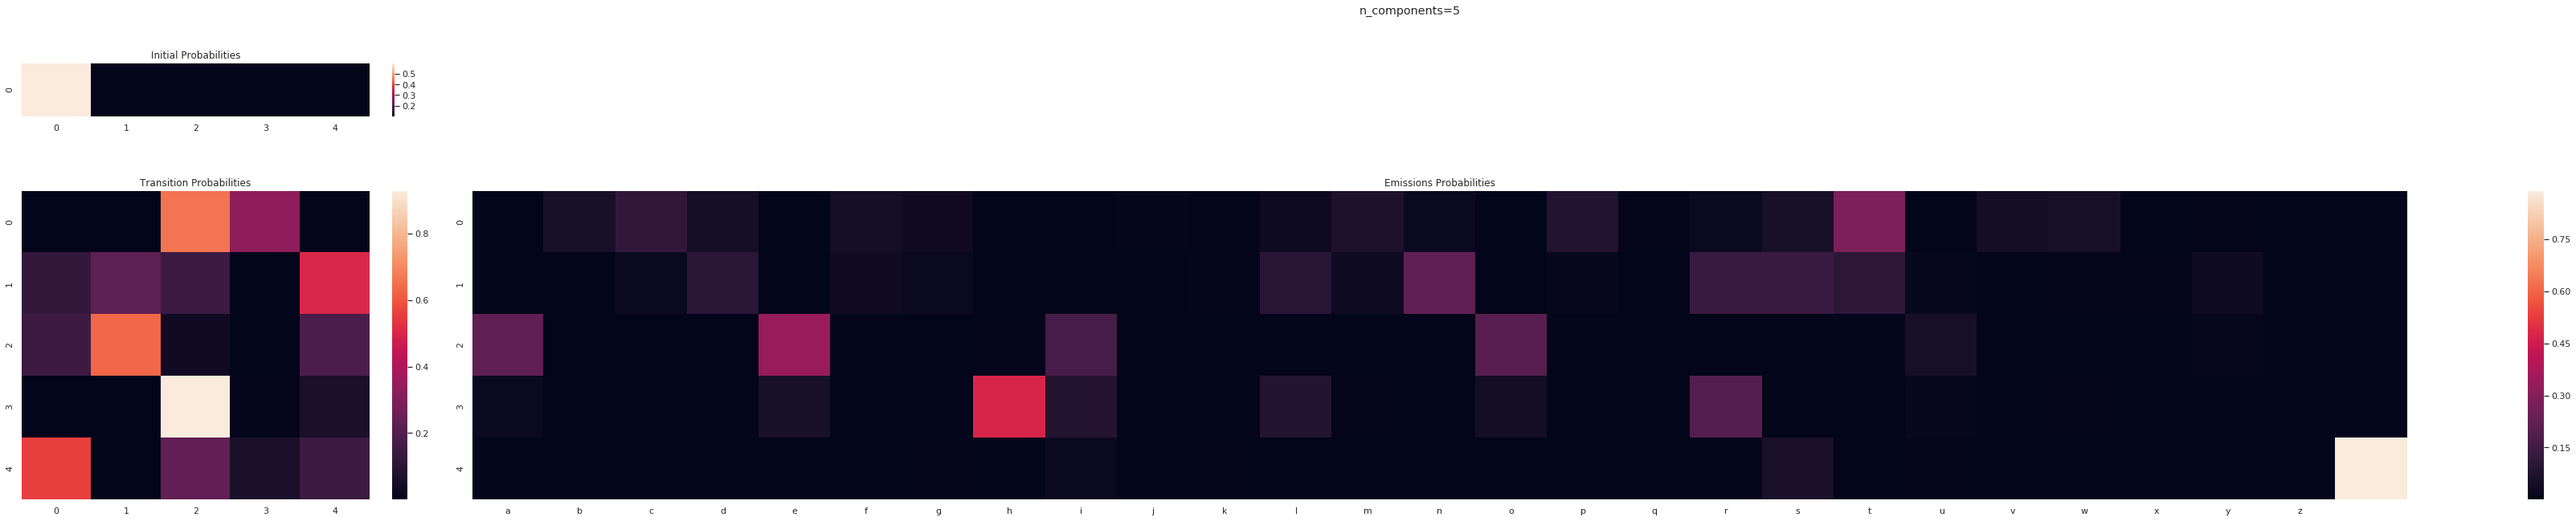

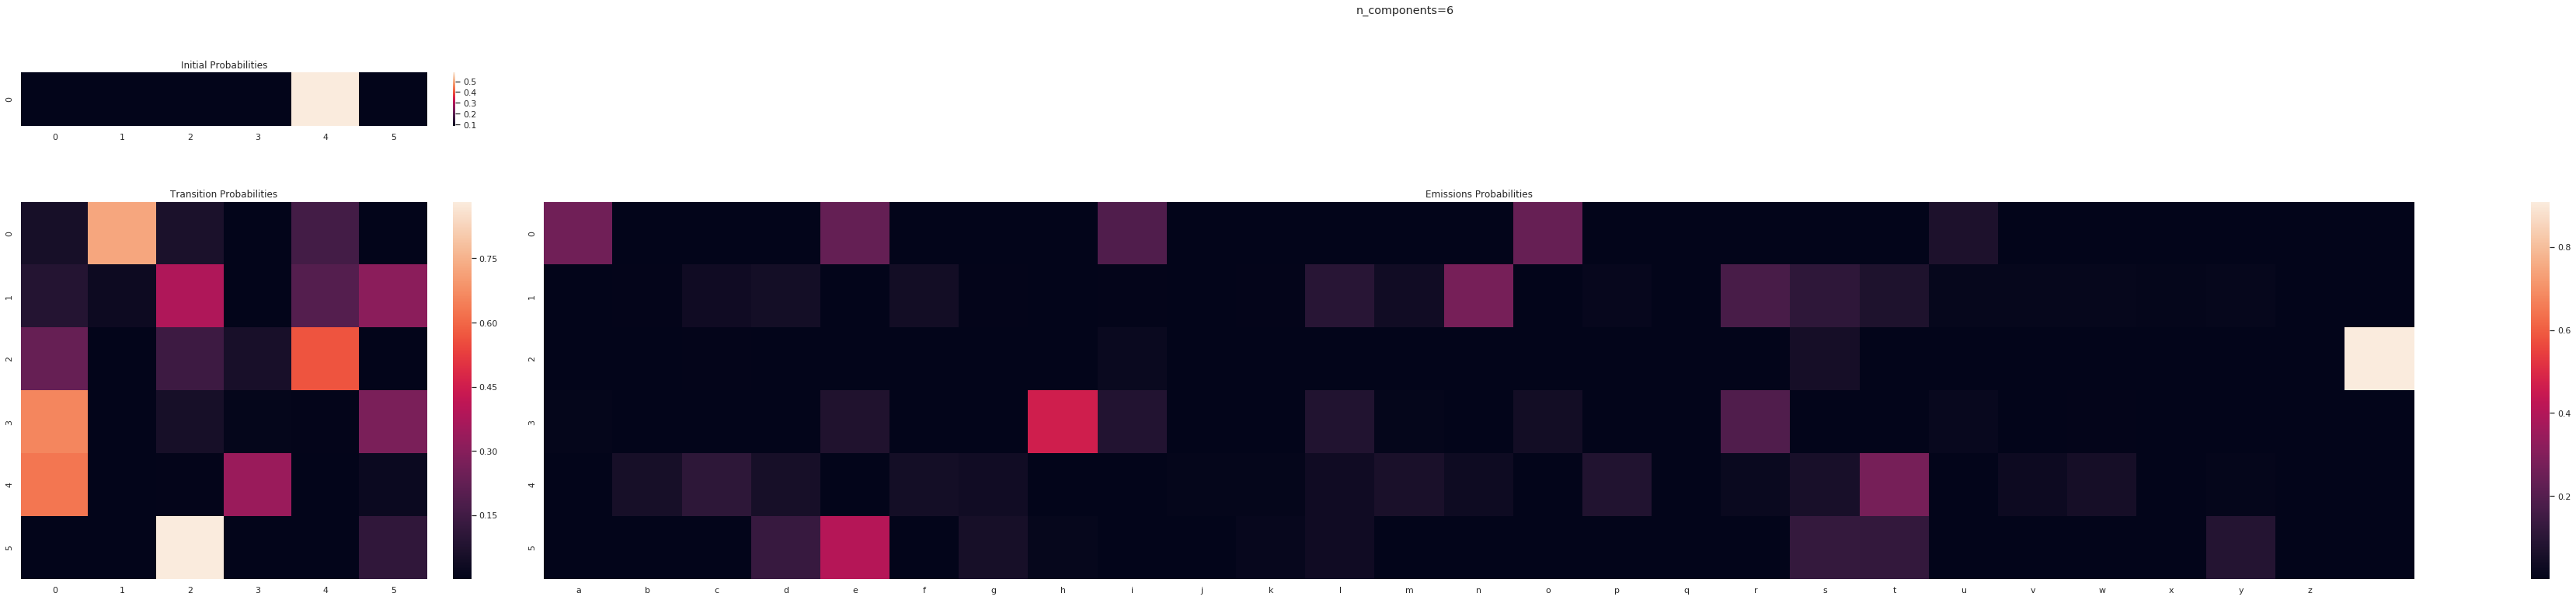

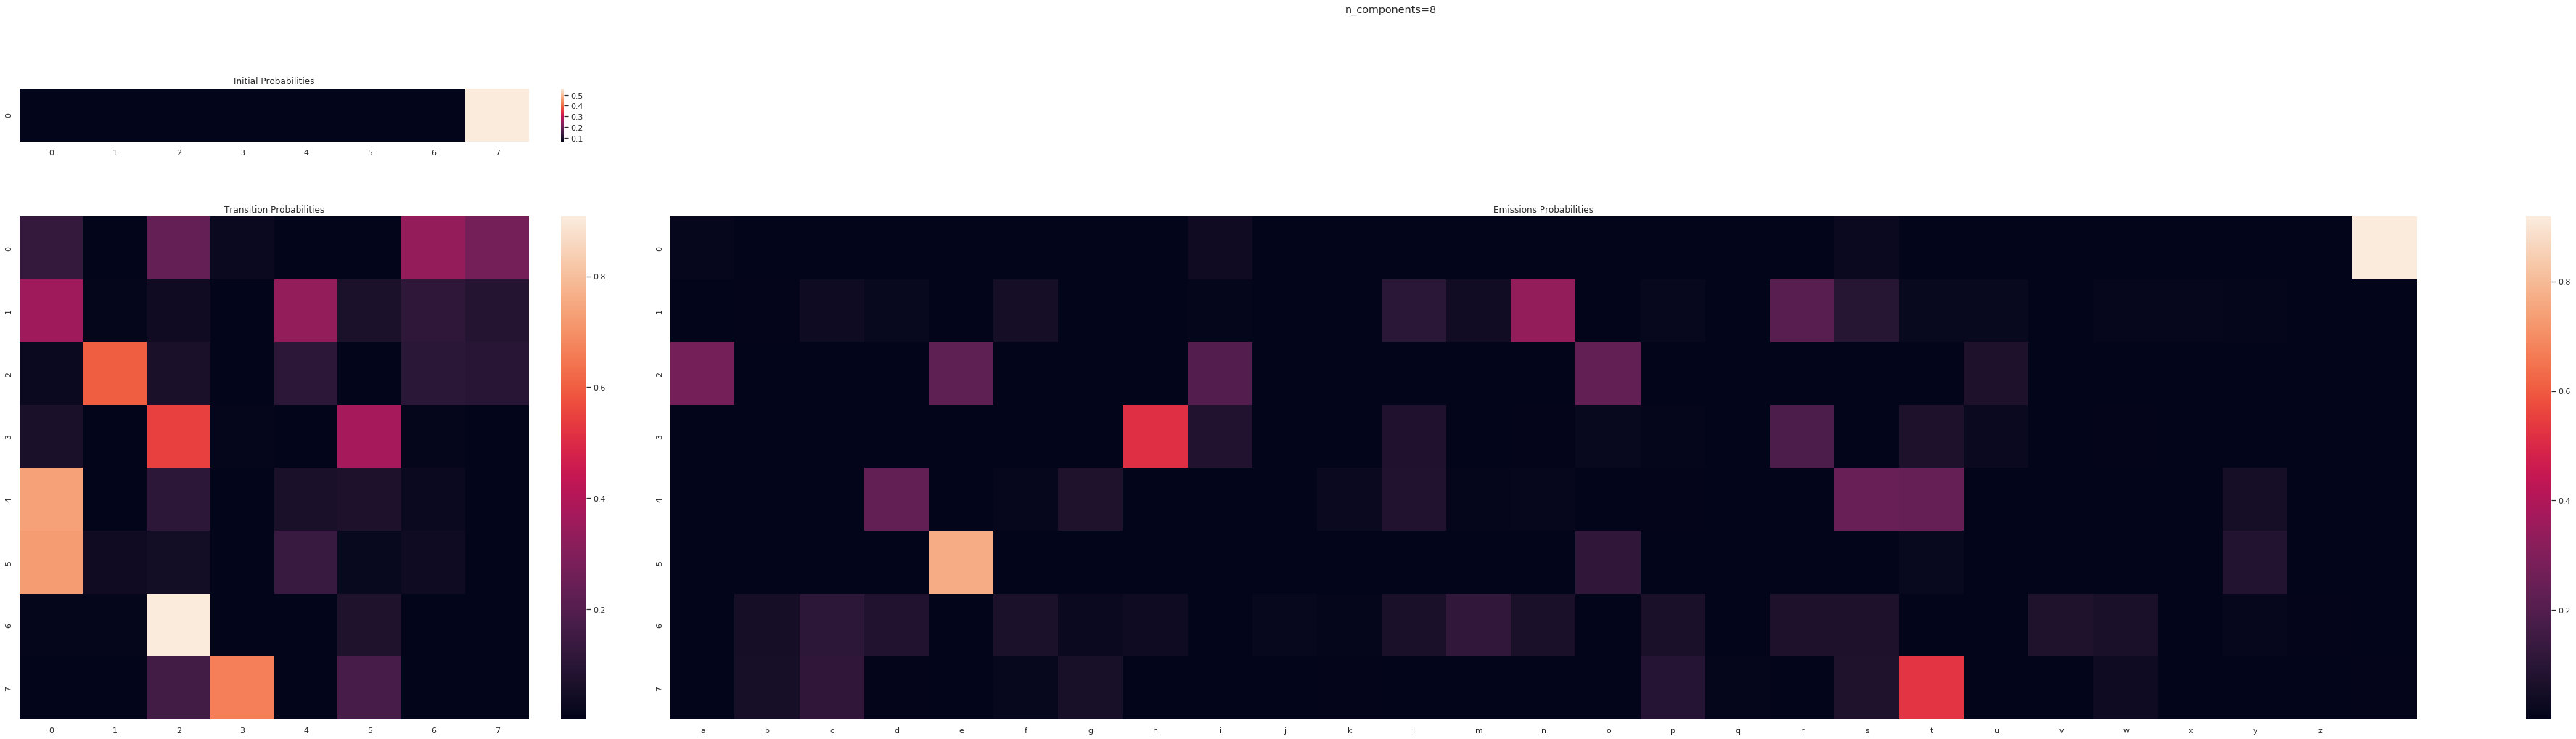

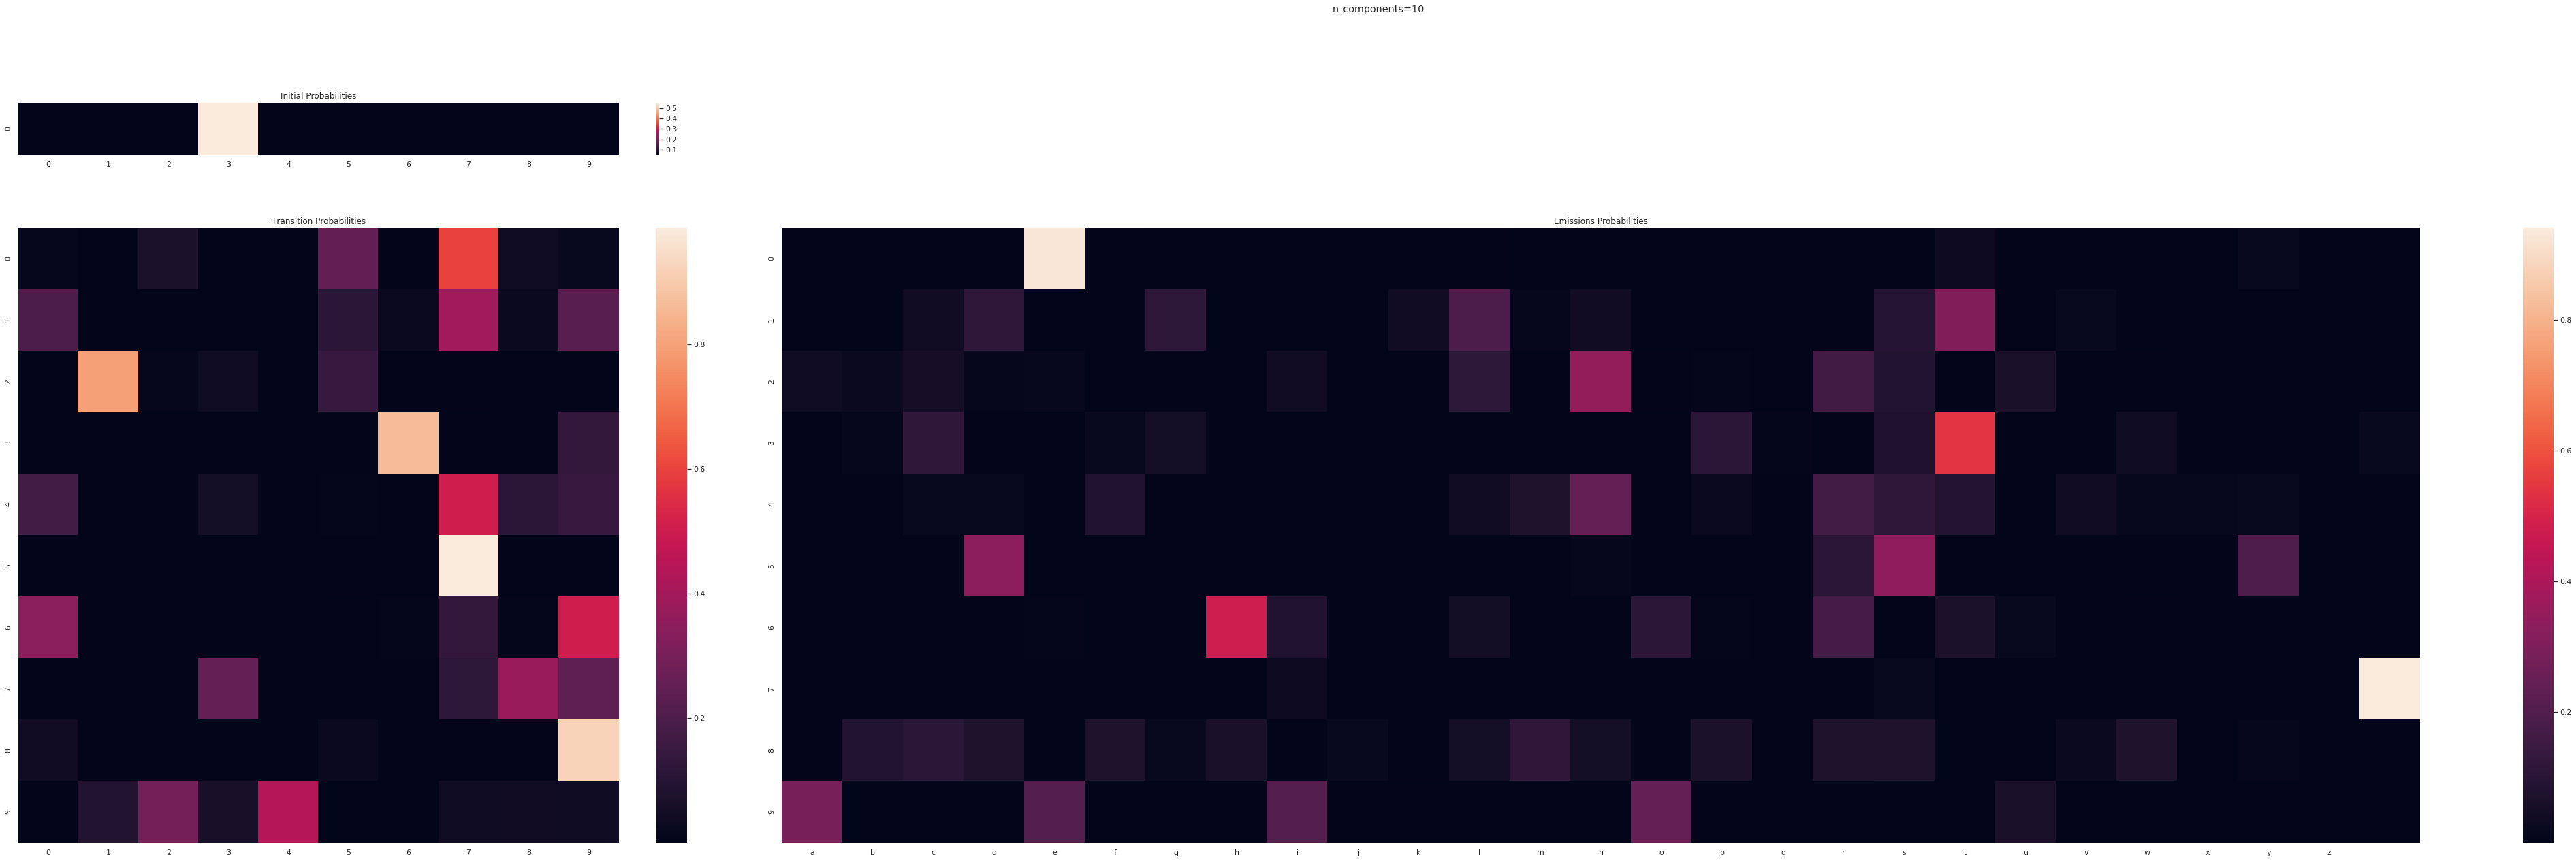

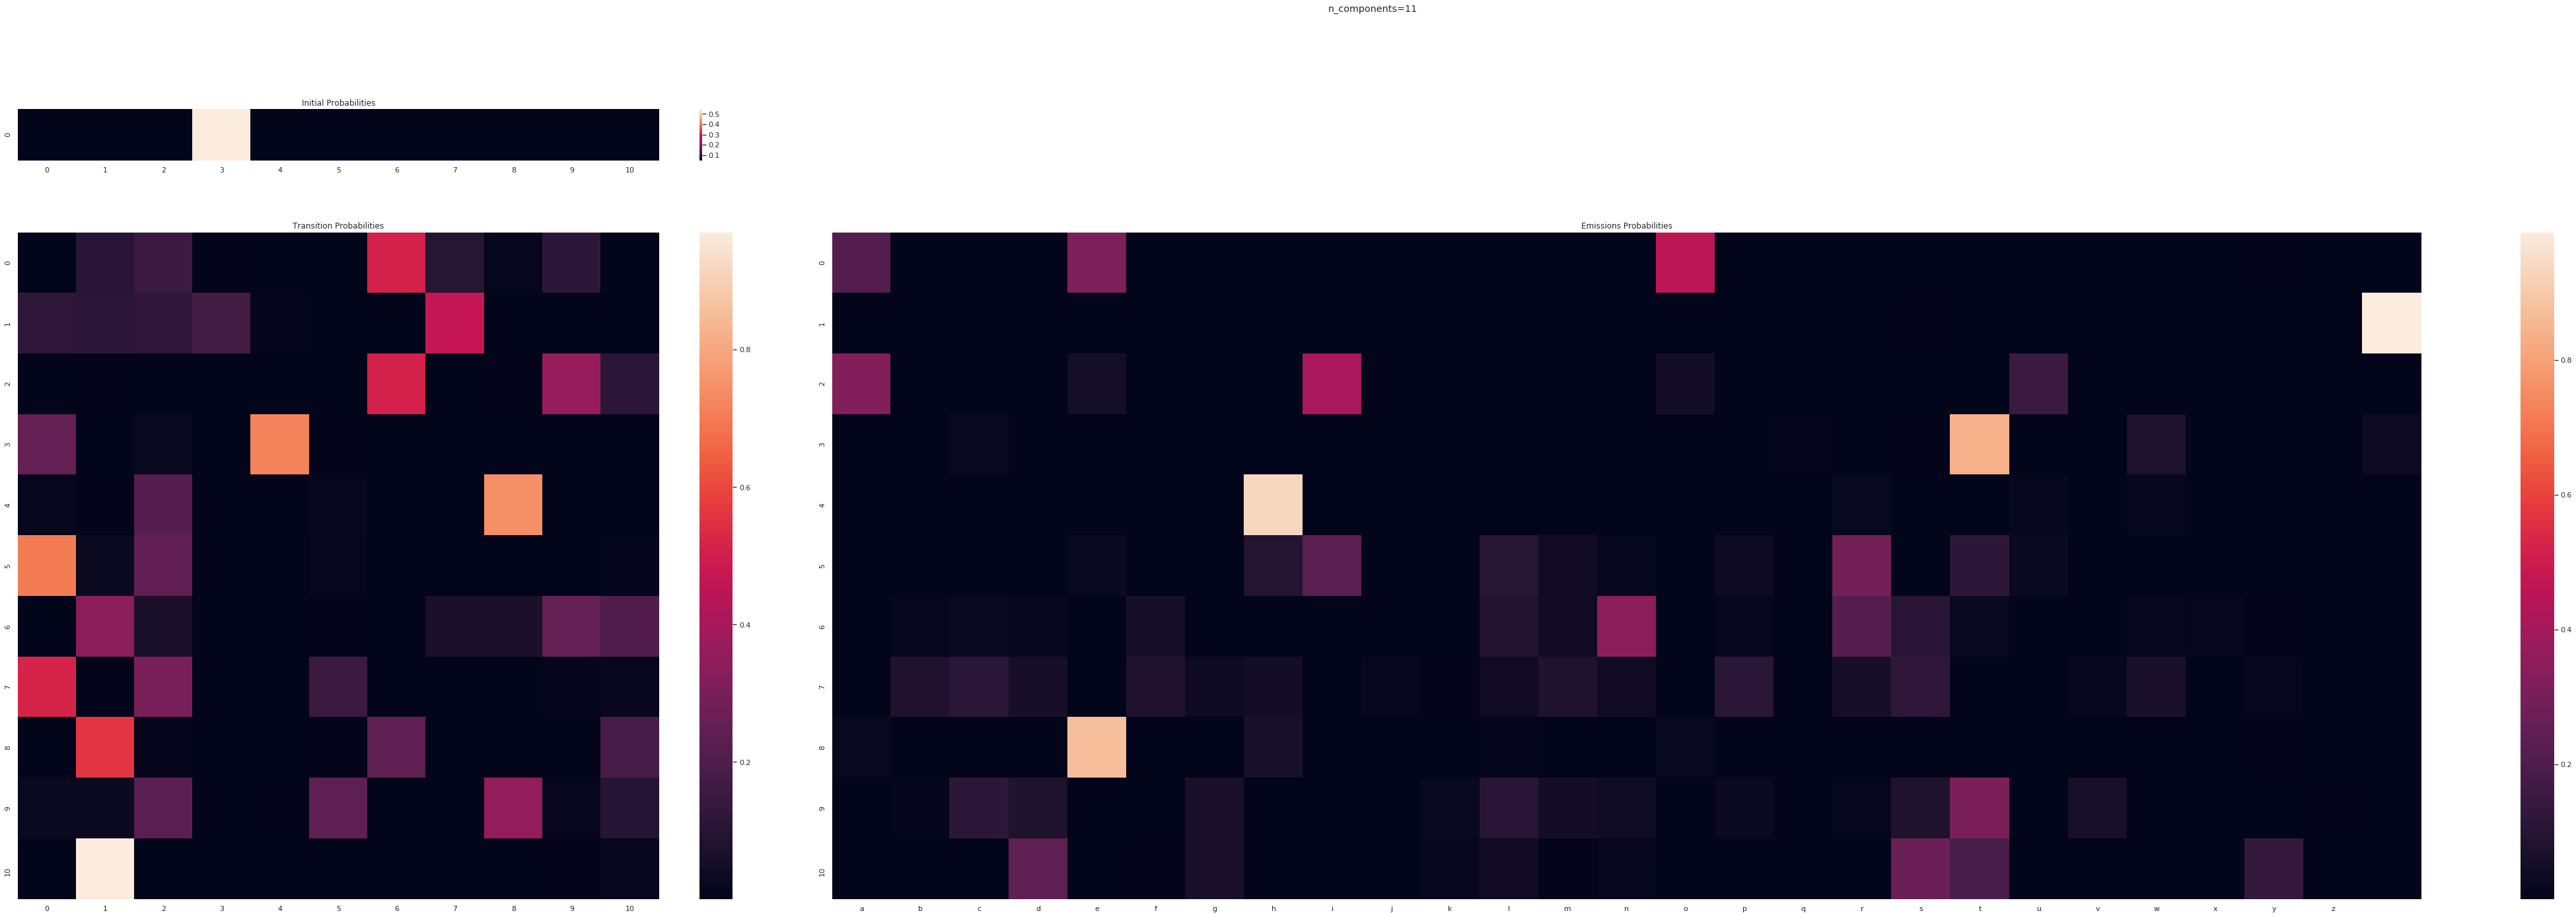

In [17]:
for i, model in models.items():
    f = plots.hinton_diagram(model.pi_normalized_, model.A_normalized_, model.B_normalized_, b_vals=letters)
    f.suptitle("n_components={}".format(i))

In [19]:
# Set the B_prior to one otherwise when we sample the initial distribution
# for the emissions we will end up with probabilities less than machine precision
em_models = {}
for i in range(2, 12):
    em_models[i] = CategoricalHMM.CategoricalHMM(
        n_components=i, n_iterations=1000, n_inits=5, 
    )
    em_models[i].fit(sequence2d)

In [ ]:
for i, model in em_models.items():
    f = plots.multiple_learning_plot(model.explored_free_energies_)
    f.suptitle("n_components={}".format(i))
    

In [ ]:
for i, model in models.items():
    f = plots.learning_plot(model.lower_bound_)
    f.suptitle("n_components={}".format(i))
    

In [ ]:
for i, model in models.items():
    f = plots.hinton_diagram(model.pi_, model.A_, model.B_, b_vals=letters)
    f.suptitle("n_components={}".format(i))

In [ ]:
plots.learning_plot(em_hmm.loglikelihoods_)